In [1]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import konlpy
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import konlpy.tag

def get_blog():
    keyword = input('검색어를 입력하세요:')
    client_id = "OKQPTGKiQf0V3yitzK6o"
    client_secret = "uIGSvzveCB"

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
            # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                print(response_body.decode('utf-8'))
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)
                jdata['items']
                
                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)
                

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)


    f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    #여기서 결과를 리턴해줘야 쓸수있음
    return result

In [9]:


def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()


def get_text(data):
    result_text = ''
    for temp in data:
        result_text = result_text +' ' +  temp[2]

    return result_text


def Wordcloud(data , savename , maskname=''):
    noun_text = ''
    for word in data:
        noun_text = noun_text +' ' + word
    
    if maskname == '':
        wc = WordCloud( font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='Blues').generate(noun_text)
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='../data/WordCloud/font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='Blues').generate(noun_text)
        
#     wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file('../data/크롤링/savename' + '.png')


In [10]:
bdata = get_blog()# 여기를 블로그 대신 뉴스나 카페로 고치면 뉴스나 카페로 크롤링 가능
rtext = get_text(bdata)

검색어를 입력하세요:노인보호구역
{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:24 +0900",
"total": 44067,
"start": 1,
"display": 100,
"items": [
{
"title": "<b>노인보호구역</b> ‘실버존’ 제대로 알고 지켜주세요!",
"link": "https:\/\/blog.naver.com\/safeppy?Redirect=Log&logNo=222008845357",
"description": "어린이 보호구역처럼 노인들 역시 많은 보호와 관심이 필요합니다. 복지관을 이용하며 <b>노인보호구역</b>을 매일 지난다는 81세 김 할머니는 “내 앞을 씽 지나가는 차량 때문에 놀라 넘어질 뻔한 적이 있다. 우리는... ",
"bloggername": "대한민국 119_소방청 공식 블로그",
"bloggerlink": "https://blog.naver.com/safeppy",
"postdate": "20200622"

},
{
"title": "어린이,장애인,<b>노인 보호구역</b> 벌점 범칙금 과태료",
"link": "https:\/\/blog.naver.com\/lky94312?Redirect=Log&logNo=222076100907",
"description": "도로에서 운전을 하다 보면 어린이보호구역, <b>노인보호구역</b>, 장애인보호구역이라는 표시를 보게 된다.... 교통약자 보호구역 및 관련시설 교통약자보호구역은 어린이, 노인, 장애인 등과 같이 신체적으로... ",
"bloggername": "알뜰한 잡학",
"bloggerlink": "https://blog.naver.com/lky94312",
"postdate": "20200831"

},
{
"title": "<b>노인보호구역</b>, 실버존(Silver Zone)",
"link": "https:\/\/blog.naver.com\/12sunrise703?Redirect=Log&logNo=222324946366

{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:25 +0900",
"total": 44067,
"start": 101,
"display": 100,
"items": [
{
"title": "지정하면 뭐하나…'있으나마나' <b>노인보호구역</b>[MBC뉴스데스크]",
"link": "https:\/\/blog.naver.com\/impear?Redirect=Log&logNo=222236028094",
"description": "앵커 어린이 보호 구역 처럼 어르신들 많이 오가는 지역에 '<b>노인 보호 구역</b>'이 있습니다. 얼마 전... &quot; <b>노인보호구역</b> 지정은 늘고 있지만 정작 노인들은 보호받지 못한 채 불안한 보행을 하고 있습니다. MBC뉴스... ",
"bloggername": "곰바이보험하늘",
"bloggerlink": "https://blog.naver.com/impear",
"postdate": "20210208"

},
{
"title": "울산 남구 ‘2021년도 어린이 <b>보호구역</b> 개선사업’을... ",
"link": "https:\/\/blog.naver.com\/ulsan-namgu?Redirect=Log&logNo=222490378779",
"description": "어린이, <b>노인 보호구역</b>을 보행하는 중 발생한 사고입니다. 이처럼 교통약자를 위한 교통안전 준수가 매우 시급한 상황입니다. 이에 정부에서는 어린이보호구역에서의 교통 법규 위반 시 과태료를 상향하여... ",
"bloggername": "울산광역시 남구",
"bloggerlink": "https://blog.naver.com/ulsan-namgu",
"postdate": "20210901"

},
{
"title": "스쿨존·횡단보도 등 <b>보호구역</b>에서 교통법규 위반 시... ",
"link": "https:\/\/blog.naver.com\/sexysbkang?Redirect=Log&logN

{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:25 +0900",
"total": 44067,
"start": 301,
"display": 100,
"items": [
{
"title": "아산시, <b>노인보호구역</b> 대폭 확대",
"link": "https:\/\/blog.naver.com\/lyjsimon?Redirect=Log&logNo=221772744266",
"description": "시 관계자는 &quot;<b>노인보호구역</b> 내 노인 교통사고 제로화를 목표로 교통약자인 노인들이 안전하게 보행할 수 있는 교통 환경을 조성해 어르신들이 안전한 도시가 될 수 있도록 최선을 다 하겠다&quot;고 말했다.",
"bloggername": "아름다운 세상",
"bloggerlink": "https://blog.naver.com/lyjsimon",
"postdate": "20200115"

},
{
"title": "가평군, 교통약자 <b>보호구역</b> 개선사업 추진",
"link": "https:\/\/blog.naver.com\/gpjn2011?Redirect=Log&logNo=222082468129",
"description": "가평군이 어린이·노인·장애인 보호구역에 대한 개선을 통해 교통약자에 대한 보행안전 도모 및... 특히 개선사업이 진행되는 8개소는 지난해 어린이 및 <b>노인보호 구역</b>으로 지정된 곳으로 금년 하반기 사업을... ",
"bloggername": "가평저널",
"bloggerlink": "https://blog.naver.com/gpjn2011",
"postdate": "20200907"

},
{
"title": "아산경찰서, <b>노인보호구역</b> 30개소에 교통안전 현수막 게첨",
"link": "https:\/\/blog.naver.com\/satleceo?Redirect=Log&logNo=220929615881",
"description": "아산경찰서(서장 김종민)는 

{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:26 +0900",
"total": 44067,
"start": 501,
"display": 100,
"items": [
{
"title": "서울시, <b>노인보호구역</b> 16곳 추가지정",
"link": "https:\/\/blog.naver.com\/laybud?Redirect=Log&logNo=30027851830",
"description": "<b>노인보호구역</b>은 초등학교 주변에 설치된 어린이 보호구역처럼 경로당을 비롯한 노인복지시설 출입문을 중심으로 300m 이내 도로 중 일정구간에 설치된다. 이곳에서는 차량 운행이 30km/h 이내로 제한되고... ",
"bloggername": "제18대 국회의원선거 중랑(을) 예비후보 정웅정",
"bloggerlink": "https://blog.naver.com/laybud",
"postdate": "20080218"

},
{
"title": "<b>노인</b>주간<b>보호</b>센터, <b>노인</b>장애인 편의시설 설치기준",
"link": "https:\/\/blog.naver.com\/ponman?Redirect=Log&logNo=221607541902",
"description": "오늘은 <b>노인</b>주간<b>보호</b>센터 <b>노인</b>장애인 편의시설에 대해 #설치기준에 대해 알아보겠습니다.... ② 장애인전용 #주차<b>구역</b> ㉠ 부설주차장에는 #장애인전용 주차<b>구역</b>을 주차장법령이 정하는 설치비율에 따라... ",
"bloggername": "포인트 디자인",
"bloggerlink": "https://blog.naver.com/ponman",
"postdate": "20190807"

},
{
"title": "내년 3월부터 <b>노인보호구역</b> 전국 실시",
"link": "https:\/\/blog.naver.com\/yoo21?Redirect=Log&logNo=6004356

{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:26 +0900",
"total": 44067,
"start": 601,
"display": 100,
"items": [
{
"title": "위례/송파/성남/강남 최대규모,최고시설 <b>노인</b>주간<b>보호</b>... ",
"link": "https:\/\/blog.naver.com\/happycare7812?Redirect=Log&logNo=222521536123",
"description": "우선 운동존과 자연친화<b>구역</b>을 계속 넓혀가고 있습니다. 어르신들께서 신체 기능유지 및 정서적 안정을... 요양<b>보호</b> #<b>노인</b>유치원 #<b>노인</b>대학 #치매센터 #치매<b>노인</b> #치매어르신 #<b>노인</b>돌봄 어르신이 더 행복한... ",
"bloggername": "어르신의 건강한 노후, 주야간보호 제대로 운영하기!",
"bloggerlink": "https://blog.naver.com/happycare7812",
"postdate": "20210930"

},
{
"title": "주의해야하는 교통약자 <b>보호구역</b>에 대해서",
"link": "https:\/\/blog.naver.com\/koyoteroy1?Redirect=Log&logNo=221974402212",
"description": "<b>노인 보호구역</b> 마지막 교통약자 보호구역에는 <b>노인 보호구역</b>이 있습니다. <b>노인보호구역</b>은 교통약자인 노인을 사고의 위험에서 보호하기 위해 양로원이나 경로당, 노인복지시설 등 노인들이 자주 다니는... ",
"bloggername": "도도 카케어서비스 월산점",
"bloggerlink": "https://blog.naver.com/koyoteroy1",
"postdate": "20200522"

},
{
"title": "대구 시창작교실, 시인<b>보호구역</b> 낭독회",
"link": "https:

{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:27 +0900",
"total": 44067,
"start": 701,
"display": 100,
"items": [
{
"title": "120. 어린이<b>보호구역</b>(School Zone) / 알기쉬운 도시계획용어",
"link": "https:\/\/blog.naver.com\/pmndceo?Redirect=Log&logNo=222226415249",
"description": "이면도로를 일방통행로로 지정·운영하는 것 관련법규 「도로교통법」 제12조(어린이 <b>보호구역</b>의 지정 및 관리) 「어린이·<b>노인</b> 및 장애인 <b>보호구역</b>의 지정 및 관리에 관한 규칙」 제9조(<b>보호구역</b>에서의... ",
"bloggername": "독일병정의 부동산길라잡이",
"bloggerlink": "https://blog.naver.com/pmndceo",
"postdate": "20210131"

},
{
"title": "어린이 <b>보호구역</b>/<b>노인</b>과 장애인 <b>보호구역</b>-교통위반 범칙금 및... ",
"link": "https://blog.daum.net/insurend4424/2789",
"description": "어린이 <b>보호구역</b>/<b>노인</b>과 장애인 <b>보호구역</b>-교통위반 범칙금 및 과태료 인상, 4월부터 집중 단속 댓글 0 세상 이야기 2015. 3. 13. 2014년12.31 개정도로교통법(시행령 88조)에 따라 1~3월까지 계도기간을 갖고... ",
"bloggername": "늘~향기있는곳 박종화",
"bloggerlink": "https://blog.daum.net/insurend4424",
"postdate": "20150313"

},
{
"title": "부산 북구 구포초등학교 어린이<b>보호구역</b> 미끄럼방지 디자인 시공",
"link": "https:\/\/blog.naver

{
"lastBuildDate": "Mon, 04 Oct 2021 23:25:27 +0900",
"total": 44067,
"start": 801,
"display": 100,
"items": [
{
"title": "어린이<b>보호구역</b> 이어, 장애인<b>보호구역</b>도",
"link": "https://blog.daum.net/e-carnewss/7827245",
"description": "정 의원이 발의한 도로교통법 개정안의 주요내용은, 기존의 '어린이보호구역'과 '<b>노인보호구역</b>'을 '교통약자보호구역'으로 통합하면서, 대상의 범위를 확대하여 장애인과 그 밖의 교통약자들도 추가하려는... ",
"bloggername": "장세인 기자",
"bloggerlink": "https://blog.daum.net/e-carnewss",
"postdate": "20090427"

},
{
"title": "&gt;,&lt;영동군, 어린이<b>보호구역</b> 무인교통단속장비 본격 운영... ",
"link": "https:\/\/blog.naver.com\/yeongdong_gun?Redirect=Log&logNo=222390876484",
"description": "영동군, 어린이<b>보호구역</b> 무인교통단속장비 본격 운영 충북 영동군은 지역내 어린이<b>보호구역</b> 7곳에... Previous image Next image 충북 영동군자원봉사센터 푸르미 봉사단(회장 이영자)은 9일 관내 취약계층 <b>노인</b>을... ",
"bloggername": "꿈과 희망이 넘치는 레인보우 영동",
"bloggerlink": "https://blog.naver.com/yeongdong_gun",
"postdate": "20210609"

},
{
"title": "어린이 <b>보호구역</b> 무인교통단속장비 확충·신호기 보강",
"link": "https:\/\/blog.naver.com\/jsu0544?Redirect=Log&logNo=222

In [11]:
#부정어사전 추가
n = pd.read_csv('../data/크롤링/사전/neg_pol_word.csv',sep='\n')
nag = []
for i in n['0']:
    nag.append(i)

In [12]:
#긍정어사전 추가
p = pd.read_csv('../data/크롤링/사전/pos_pol_word.csv',sep='\n')
pos = []
for i in p['0']:
    pos.append(i)

#불용리스트 만들기
stopwords = ['실버존','스쿨존','보호','구역','노인','어린이','등','교통','곳','지정','안전','사업','일','시설','위해','및','년','장애인','위','경로당','설치','주변',
            '교통사고','보행자','보행','환경','도로','시','유치원','이번','중','조례','복지','차량','올해','애인','개','개소','억','관내',
            '의원','전국','발생','추가','이','물','월','원','확대','내','현재','광주','리','지역','최근','대전','것','지난해','초등학교','관','인구',
            '존','완료','대한','투입','공단','기자','대해','지난','마을','로','수','총','시행','조성','추진','공원','경찰정','경찰','충남',
            '회','또','군','신규','계획','안','광주시','시스템','생활','활동','중구','어르신','윤','실버','서울시회관','경우','통행','기준','어린이집',
            '진행','구','경기도','만','윤','복지관','아산시','대책','기관','인근','행사','점검','부과','지원','대폭','도시','억원','횡단보도','전통','도',
            '서울시','시장','회관','운영','가운데','민주당','공사','제조','요양원','개정','이상','규칙','고','지자체','앞','억만원','운전','출처',
            '학교','일자리','만원','도로교통법','미끄럼','주간','주민','금','일반','표시','센터']

#불용어사전 추가
for i in stopwords:
    pos.append(i)

In [13]:
#분리
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    words = dict(count.most_common(ntags))
    
    #불용어 사전안에 있으면 삭제
    for i in pos:
        if i in words:
            del words[i]
    return words

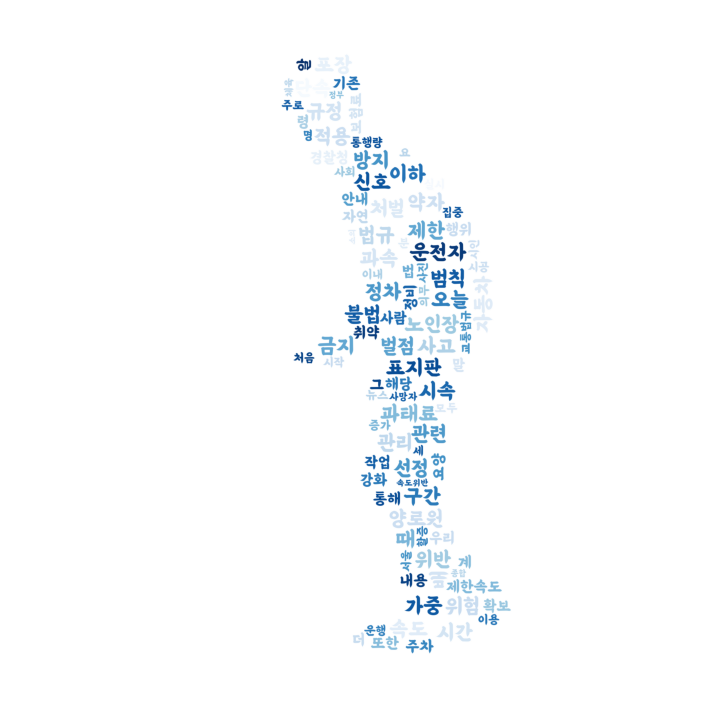

In [14]:
rtags = get_tags(rtext, ntags=200)
# print(rtags)

Wordcloud(rtags, '노인보호구역','../data/WordCloud/mask/mask1.jpeg')
